# Twitter API

## Lecture Notes

#####Why Twitter ?


"While physics and math may tell us how the universe began, they are not much use in predicting Human Behavior because there are far too many Equations to Solve" 
    
    -Stephan Hawking
    

#### Rest API vs Streaming API: 


REST:  
    - Query user accounts using OAuth
    - Allows you to access 'historical' tweets

STREAM: 
    - Essentially long-running request (left Open) using OAuth
    - Access realtime stream of data
       

#### Rest API

In [1]:
from __future__ import print_function
import pandas as pd
import re


In [2]:
# # pip install requests_oauthlib
import requests
from requests_oauthlib import OAuth1

#OAuth ~ simple way to to publish & interact with data

In [3]:
# Importing our Config

#pip install cnfg

import cnfg
config = cnfg.load(".twitter_config")

oauth = OAuth1(config["consumer_key"],
               config["consumer_secret"],
               config["access_token"],
               config["access_token_secret"])

In [4]:
response = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json",
                        auth=oauth)

tweets = response.json()

for key in tweets[0].keys():
    print(key)
    

created_at
id
id_str
text
truncated
entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang


In [68]:
for tweet in tweets:
    print(tweet['text'])

@saraamarieee @ydiaz1 that may have taken like 10 minutes for me to get, but I laughed so hard when I finally did..


In [69]:
parameters = {"q": "#fitness", "count":20}
response = requests.get("https://api.twitter.com/1.1/search/tweets.json",
                        params = parameters,
                        auth=oauth)

from pprint import pprint
pprint(response.json()['search_metadata'])

{'completed_in': 0.044,
 'count': 20,
 'max_id': 968220409744281600,
 'max_id_str': '968220409744281600',
 'query': '%23fitness',
 'refresh_url': '?since_id=968220409744281600&q=%23fitness&include_entities=1',
 'since_id': 0,
 'since_id_str': '0'}


In [70]:
tweets = response.json()['statuses']

print('PAGE 1')
for tweet in tweets:
    print(tweet['id'], tweet['text'])

PAGE 1
968220409744281600 Our supplements help you take the reins of your fitness life.

So take control now at https://t.co/8opxE1DwKx… https://t.co/wZtwDr7YVm
968220409517826048 How to Burn 1,000 calories. #weightloss #fitness #workout https://t.co/XluV8Q51t4
968220402618126336 What were your goals when you first started? Don't give up now! 
#hardwork #worthit #fitness #health https://t.co/0Cbi6NgbcZ
968220392832884737 Recuerda participar en el sorteo especial que tenemos para ti y tu pareja #Fitness siguiendo los pasos que están a… https://t.co/F2gxYumrm6
968220392191135745 When's the right time to give up_depends on what's at stake BUT Quitting becomes lifestyle-JesusChristEmpowersResolve-ASK #fitness #fitgirls
968220388806266880 4 ways to turn your living room into a #homegym https://t.co/WekYaj7Rw4 #gym  #yoga #bodybuilding #workout #fitness
968220333005266950 RT @Sunshyneland: Love a #Splash @CleHouston #bodybuildingmotivation #fitness #bikini #squats https://t.co/j7eiY8Xnh5
968

In [71]:
search_url = "https://api.twitter.com/1.1/search/tweets.json"
next_page_url = search_url + response.json()['search_metadata']['next_results']

response = requests.get(next_page_url, auth=oauth)

print('PAGE 2')
for tweet in response.json()['statuses']:
    print(tweet['text'])

KeyError: 'next_results'

### Functions for using TWEEPY 

In [5]:
from tweepy.models import Status, ResultSet
import re
from datetime import datetime
import random

def view_rate_limits():
	"""
	View's key rate limits for Twitter REST API with application authentication.
	"""

	rate_limit_dict = api.rate_limit_status()['resources'] #only one API call!

	follow_remain = rate_limit_dict["friends"]['/friends/list']['remaining']

	follow_reset_time = convert_UNIX_time(rate_limit_dict["friends"]['/friends/list']['reset'])

	search_remain = rate_limit_dict['search']['/search/tweets']['remaining']

	search_reset_time = convert_UNIX_time(rate_limit_dict['search']['/search/tweets']['reset'])

	application_remain = rate_limit_dict['application']['/application/rate_limit_status']['remaining']

	application_reset_time = convert_UNIX_time(rate_limit_dict['application']['/application/rate_limit_status']['reset'])

	user_remain = rate_limit_dict['statuses']['/statuses/user_timeline']["remaining"]

	user_reset = convert_UNIX_time(rate_limit_dict['statuses']['/statuses/user_timeline']["reset"])

	print("""
		Search Remaining: {}, Search Reset: {}

		Follow Remaining: {}, Follow Reset: {}

		User Remaining: {}, User Reset: {}

		Application Remaining: {}, Application Reset: {}

		The Current time is: {}
		""".format(search_remain, search_reset_time, follow_remain, follow_reset_time, user_remain, user_reset, application_remain, application_reset_time, datetime.now().time()))


def search_twitter(query, number):
	"""
	Argument Order: query, number

	Will search twitter for the query. Query can be a list.
	Number relates to how many tweets

	Returns a list of tweets
	"""
	assert type(query) == str, "Please enter a query in the form of a string"
	assert type(number) == int, "Please enter the number of as an integer"

	return list(tweepy.Cursor(api.search, q=query, lang='en', tweet_mode='extended').items(number))

def extract_handle(tweet):
	"""
	Argument Order: tweet

	Extracts the twitter handle for a given tweet. @ symbol not included.

	Returns the handle - string type
	"""
	assert type(tweet) == Status, "Please enter in a tweet of type Status"

	return tweet.__dict__['user'].screen_name

def extract_text(tweet):
	"""
	Argument Order: tweet

	Extracts the clean text of a tweet. Remove links and emoji's
	Returns clean text of the tweet
	"""

	#this function can be mapped to a list of tweets (status type)

	assert type(tweet) == Status, "Please enter in a tweet of type Status"

	regex = r"http\S+"
	subset = ""

	emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

	if hasattr(tweet, "text"):
		clean = re.sub(regex, subset, tweet.text.strip())
		clean = emoji_pattern.sub(subset, clean).strip()
	else:
		clean = re.sub(regex, subset, tweet.full_text.strip())
	return clean

# def extract_hashtags(tweet):
# 	"""
# 	Argument Order: tweet

# 	Returns hastags present in a given tweet

# 	list(map(extract_hashtags, no_rt_gabr))
# 	"""
# 	assert type(tweet) == Status, "Please enter in a tweet of type Status"
	
# 	if hasattr(tweet, "text"):
# 		return [i for i in tweet.text.split() if i.startswith("#")]
# 	else:
# 		return [i for i in tweet.full_text.split() if i.startswith("#")]

def extract_hashtags(tweet):
	"""
	Argument Order: tweet

	Return a list of hastags present in a given tweet
	"""
	hashtags = []
	assert type(tweet) == Status, "Please enter in a tweet of type Status"

	if hasattr(tweet, "entities"):
		if tweet.entities['hashtags'] == []:
			return []
		else:
			for i in tweet.entities['hashtags']:
				hashtags.append(i['text'])
	else:
		print("No entity method!")
	return hashtags


def extract_datetime(tweet):
	"""
	Argument Order: tweet

	Returns a datetime object
	"""
	assert type(tweet) == Status, "Please enter in a tweet of type Status"

	return tweet.created_at

def extract_users_tweets(handle, number):
	"""
	Argument Order: handle, number of tweets to extract
	
	Extract's a user's tweets
	"""
	final = ResultSet() #can change to resultset later if I want

	try:
		for status in tweepy.Cursor(api.user_timeline, screen_name=handle, count=200, include_rts=True).items(number):
			final.append(status)
	except:
		print("{} is a protected user!")
		return []

	return final

# def remove_retweets(lst):
# 	"""
# 	Given a ResultSet of tweets, removes those that are RT's

# 	Returns a ResultSet.
# 	"""
# 	assert type(lst) == ResultSet, "Please enter a ResultSet of user's tweets to be filtered."

# 	final = ResultSet() 

# 	if hasattr(lst[0], "text"):

# 		aux = (x for x in lst if "RT @" not in x.text) #dont need it to be a list

# 		for i in aux:
# 			final.append(i)
# 	else:
# 		aux = (x for x in lst if "RT @" not in x.full_text) #dont need it to be a list

# 		for i in aux:
# 			final.append(i)

# 	return final

def average_retweets(lst, handle):
	"""
	Argument Order: lst, handle

	Given a ResultSet of tweets, calculate the average retweet count for all tweets in ResultSet.

	Be sure to only apply this on a ResultSet that excludes retweets.

	This function would be amazing with firehose API
	"""
	assert type(lst) == ResultSet, "Please enter a ResultSet of user's tweets."

	count = 0
	
	for tweet in lst:
		count += tweet.retweet_count

	return count/len(lst)

def get_all_following(handle):
	"""
	Argument Order: handle

	Returns all the followers for a particular handle.

	Warning: This burns through rate limit
	"""
	final = []

	for friend in tweepy.Cursor(api.friends, screen_name=handle, count=200).items():
		final.append(friend.screen_name)
	return final

def get_100_following(handle):
	"""
	Argument Order: handle

	Returns the 100 most recent handles that the specified user followed.

	This function has been optimised for rate limiting.

	NOTE: If given access to firehose API - this function could be altered slightly to obtain all friends.
	"""

	final = []

	try:
		for friend in tweepy.Cursor(api.friends, screen_name=handle, count=100).items(100):
			final.append(friend.screen_name)
	except:
		print("Skipping - {} has protected tweets!".format(handle))
		return []

	return final

def second_layer_following(lst):
	"""
	Argument Order: lst

	For a given list of twitter handles, extract who they follow.

	This function will only extract the first 100 of followers for a given handle - this is due to rate limiting.

	This function will return a 'flat' list of all followers.

	NOTE: If given access to firehose API - this function could be altered slightly to obtain the entire secondary layer
	"""
	cnt = 0

	second_layer = []

	for handle in lst:
		print("processing {}".format(handle))
		second_layer.append(get_100_following(handle))
		print()
		cnt+= 1
		if cnt%10 == 0:
			print()
			print("processed {} handles from a total of {}".format(cnt, len(lst)))
			print()

	flat_second_layer = sum(second_layer, [])

	return flat_second_layer

def random_sample_lst(lst):
	"""
	Argument Order: lst

	Extracts the a random 25% of a given list
	"""
	return random.sample(lst, len(lst)//4)

def distinct(lst1, lst2):
	"""
	Argument order: source following list, accumulated source's following list
	"""

	following = lst1

	second_layer_following = lst2

	unique = set(following)

	final = [x for x in second_layer_following if x not in unique]

	return final

## Extract columns for dataframe ( text, hashtags, etc)

In [6]:
fit_tweets = search_twitter('#health',25000)

NameError: name 'tweepy' is not defined

In [284]:
hashtags4 = []

for tweet in fit_tweets4:
    hashtags4.append(extract_hashtags(tweet))

In [285]:
tweet_text4 =[]


for tweet in fit_tweets4:
    tweet_text4.append(extract_text(tweet))

In [286]:
date_time4 = []

for tweet in fit_tweets4:
    date_time4.append(extract_datetime(tweet))

In [288]:
handle4 = []

for tweet in fit_tweets4:
    handle4.append(extract_handle(tweet))

In [289]:
df4 = pd.DataFrame()
    #data=pd.DataFrame(id_list,columns=['id'])
    
    #data["text"]= [tweet.text.encode('utf-8') for tweet in results]
df4["text"] = tweet_text4
df4["hashtags"] = hashtags4
df4["handle"]= handle4
df4["datetime"] = date_time4
    #data["Location"]=[tweet.place for tweet in results]
    
df4

,text,hashtags,handle,datetime
0,What’s a sticker got to do with the fitness in...,[fitness],Tiiunapp,2018-02-27 17:42:20
1,Fitbit posted a weaker-than-expected quarter a...,"[fitness, fitnesstracker, TwineHealth]",DigitalVillain,2018-02-27 17:42:07
2,Old post but still needs some attention 😒👊 🚨ST...,[fitness],busy_gettinbig,2018-02-27 17:42:04
3,"As a busy mum, I just don't have time to go to...","[fitness, parenting]",lifeunexpected2,2018-02-27 17:42:04
4,"RT @realbuzzcom: February, the month of love! ...","[running, fitness]",mazofcydonia,2018-02-27 17:42:01
5,RT @NorthcoteSch: The children smashed tonight...,"[fitness, fun]",MacDicky,2018-02-27 17:41:45
6,RT @ADevotedYogi: now on #Instagram: \nADevot...,"[Instagram, yoga, fitness]",LohasTopStories,2018-02-27 17:41:40
7,Want to go #NSNG? Wondering why your #Diet has...,"[NSNG, Diet, fitness, wellness, podcast, motiv...",uncorkingastory,2018-02-27 17:41:39
8,Fun on the fun bag to warm down #fitness #card...,"[fitness, cardio, boxing, dadswithabs]",paulmort,2018-02-27 17:41:34
9,Introducing the New(ish) Sweetener That We're ...,"[fitness, healthy]",healthyzonenr1,2018-02-27 17:41:22


In [308]:
df4.to_csv('Tweets.csv')

### Extracting More Data

In [16]:
fit_tweets3 = search_twitter('#fitness', 10000)

AssertionError: Please enter a query in the form of a string

In [278]:
hashtags3 = []

for tweet in fit_tweets3:
    hashtags3.append(extract_hashtags(tweet))

In [279]:
tweet_text3 =[]


for tweet in fit_tweets3:
    tweet_text3.append(extract_text(tweet))

In [280]:
date_time3 = []

for tweet in fit_tweets3:
    date_time3.append(extract_datetime(tweet))

In [281]:
handle3 = []

for tweet in fit_tweets3:
    handle3.append(extract_handle(tweet))
    
    

In [282]:
df3 = pd.DataFrame()
    #data=pd.DataFrame(id_list,columns=['id'])
    
    #data["text"]= [tweet.text.encode('utf-8') for tweet in results]
df3["text"] = tweet_text3
df3["hashtags"] = hashtags3
df3["handle"]= handle3
df3["datetime"] = date_time3
    #data["Location"]=[tweet.place for tweet in results]
    
df3

,text,hashtags,handle,datetime
0,You're at risk of 10 nasty diseases if you car...,"[VisceralFat, Wellness, fitness]",TWNglobal,2018-02-27 17:14:20
1,RT @FitnessXory: Looking for Fitness accesorie...,"[yoga, fitness, workout]",MuslimModer,2018-02-27 17:14:15
2,Rows after squats... feels bad. #fitness,[fitness],BlairBroon,2018-02-27 17:14:11
3,#Hurry #Hurry #Hurry Ends this Sunday Join @Pu...,"[Hurry, Hurry, Hurry, Rochdale, JoinToday, Gym...",PureRochdale,2018-02-27 17:14:08
4,Comfort and versatility! \n\n\n\n#beauty #fash...,"[beauty, fashion, fitness, gymwear, healthy, l...",AStyleBlitz,2018-02-27 17:14:08
5,Positive Mind. Positive Results. DP #blessed #...,"[blessed, motivation, music, me, coffee, fitne...",DanielPeterlive,2018-02-27 17:14:06
6,Paid a FORTUNE for health care—followed the do...,"[fat, fitness]",B____Free,2018-02-27 17:13:53
7,What do you think? #horny #sex #naked #hot #to...,"[horny, sex, naked, hot, topless, fitness, abs...",leosaldana75,2018-02-27 17:13:35
8,Fall vs Spring #PushUp #Data. #Improvement #F...,"[PushUp, Data, Improvement, Fitness]",PETeacherMk,2018-02-27 17:13:35
9,"RT @realbuzzcom: February, the month of love! ...","[running, fitness]",greigo_uk,2018-02-27 17:13:34


### Further data Extraction

In [141]:
fit_tweets2 = search_twitter('#vegetarian', 10000)

Rate limit reached. Sleeping for: 313
Rate limit reached. Sleeping for: 824


In [142]:
hashtags2 = []

for tweet in fit_tweets2:
    hashtags2.append(extract_hashtags(tweet))

In [143]:
tweet_text2 =[]


for tweet in fit_tweets2:
    tweet_text2.append(extract_text(tweet))

In [144]:
date_time2 = []

for tweet in fit_tweets2:
    date_time2.append(extract_datetime(tweet))

In [145]:
handle2 = []

for tweet in fit_tweets2:
    handle2.append(extract_handle(tweet))

In [146]:
df2 = pd.DataFrame()
    #data=pd.DataFrame(id_list,columns=['id'])
    
    #data["text"]= [tweet.text.encode('utf-8') for tweet in results]
df2["text"] = tweet_text2
df2["hashtags"] = hashtags2
df2["handle"]= handle2
df2["datetime"] = date_time2
    #data["Location"]=[tweet.place for tweet in results]
    
df2

,text,hashtags,handle,datetime
0,RT @preppersproduce: #preppersproduce#healthyl...,"[vegetarian, foodporn, besatisfied]",EssexFoodPorn,2018-03-01 17:19:57
1,#Vegan #Vegetarian #pescatarian #flexitarian #...,"[Vegan, Vegetarian, pescatarian, flexitarian, ...",PlumsOfDoom,2018-03-01 17:18:32
2,It's easy to eat more vegetables! Drizzle our ...,"[vegetarian, meatlessmondays]",HoneyRidgeFarms,2018-03-01 17:18:04
3,Please RT? #vegetarian #vegan #healthyfood #re...,"[vegetarian, vegan, healthyfood, recipes]",vegetarian_club,2018-03-01 17:17:31
4,Are you in or near #Clapham #wholefoods market...,"[Clapham, wholefoods, snow, chocolate, Fairtra...",vegsocapproved,2018-03-01 17:17:08
5,#preppersproduce#healthylifestyle #vegetarian ...,"[vegetarian, foodporn, besatisfied]",preppersproduce,2018-03-01 17:17:01
6,RT @PestoChampion: #London #Foodie #Pestochamp...,"[London, Foodie, Pestochampion, Organic, Candy...",luxlive10,2018-03-01 17:14:26
7,3/1 - PAD THAI THURSDAY! Chef's Choice. Made-t...,"[Ptown, CapeCod, vegetarian, Cafe, YUM]",141Bradford,2018-03-01 17:14:05
8,RT @FabFood4All: Easy Roasted Celeriac Soup is...,"[celeriac, soup, veggie, vegetarian, PMHT, 87RT]",vehement_soup,2018-03-01 17:11:51
9,RT @riverdaleperk: Miso Cold ! 🤪Today we got J...,"[soup, vegetarian, vegan]",vehement_soup,2018-03-01 17:11:31


In [147]:
len(tweet_text2)

10000

In [140]:
veg_tweets = search_twitter('#vegetarian', 100000)

KeyboardInterrupt: 

In [153]:
hashtags = []

for tweet in fit_tweets:
    hashtags.append(extract_hashtags(tweet))

In [168]:
tweet_text =[]


for tweet in fit_tweets:
    tweet_text.append(extract_text(tweet))

In [169]:
date_time = []

for tweet in fit_tweets:
    date_time.append(extract_datetime(tweet))

In [170]:
handle = []

for tweet in fit_tweets:
    handle.append(extract_handle(tweet))

### Import tweets into pandas

In [172]:
df = pd.DataFrame()
    #data=pd.DataFrame(id_list,columns=['id'])
    
    #data["text"]= [tweet.text.encode('utf-8') for tweet in results]
df["text"] = tweet_text
df["hashtags"]= hashtags
df["handle"]= handle
df["datetime"]= date_time
    #data["Location"]=[tweet.place for tweet in results]
    
df

,text,hashtags,handle,datetime
0,Secrets to great body circulation and Million ...,"[entrepreneurship, fitness, weightloss]",JVCrum,2018-02-27 00:29:22
1,#fitness Student Disagreement Escalates at Int...,[fitness],EricaLanding,2018-02-27 00:29:06
2,The latest Best Abs Diet! Thanks to @thehealt...,"[healthy, fitness]",Bestabsdiet,2018-02-27 00:28:36
3,The New Adidas Wanderlust Collection Has Piece...,[Fitness],speedcatfitness,2018-02-27 00:28:06
4,〰️🏋🏻‍♂️〰️ #life 〰️ 🔛🔥➖ #fun #fitness ➖Thanks f...,"[life, fun, fitness]",l00ss_weight,2018-02-27 00:27:58
5,RT @CelebFitnessTV: 9 Ways to Get a Great Work...,[fitness],BeautyFirst4U,2018-02-27 00:27:28
6,RT @ToastyCritic: It’s time to remember #fitne...,[fitness],crueltyfreelucy,2018-02-27 00:27:11
7,RT @Charlesfrize: #Health - #Wellbeing #Diet a...,"[Health, Wellbeing, Diet, Fitness, FrizeMedia]",botmachina,2018-02-27 00:26:06
8,"I’ll take pork on pork, with my sides cooked i...","[health, healthy, healthyfood, intuitiveeating...",teambrttne,2018-02-27 00:26:02
9,RT @MaryanaW: Today’s Workout Complete!!! #Mon...,"[MondayMotivaton, fitness, circuittraining, ba...",mzkitty78,2018-02-27 00:26:00


In [306]:
df4['text'][6669]

"RT @KonsoleGroup: All the Konsolers got together to celebrate this month's #jubilate where the theme for the day was #fitness and everybody…"

#### STREAMING API ~ TWEEPY

In [7]:
# pip install tweepy
import tweepy

#auth = tweepy.OAuthHandler(config["consumer_key"],
#                           config["consumer_secret"])
auth = tweepy.AppAuthHandler(config["consumer_key"],
                           config["consumer_secret"])

#auth.set_access_token(config["access_token"],
#                      config["access_token_secret"])

api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [213]:
max_tweets=1

#Tweepy Cursor handles pagination .. 

for tweet in tweepy.Cursor(api.search,q="'#fitness OR #workout OR #yoga OR #crossfit OR #GetStrong OR #Sweat OR #WeightTraining OR #gym OR #mobility OR #gymnastics OR #fitnessaddict OR #gymlife OR #run OR #running OR #cardio OR #fitfam OR #cycling OR #swimming OR #weights OR #calisthenics OR #bodyweight OR #strengthtraining OR #strength'").items(max_tweets):
       print(tweet)

Status(_api=<tweepy.api.API object at 0x12369e6a0>, _json={'created_at': 'Tue Feb 27 05:03:36 +0000 2018', 'id': 968350884005543937, 'id_str': '968350884005543937', 'text': 'RT @FitnessWomenF: Marialye Trottier🔥😍💪@Marialyefitness   📸➡️@surraca    #fitness #fit #gym #athlete #HardBody https://t.co/2ugpF4XyIq', 'truncated': False, 'entities': {'hashtags': [{'text': 'fitness', 'indices': [73, 81]}, {'text': 'fit', 'indices': [82, 86]}, {'text': 'gym', 'indices': [87, 91]}, {'text': 'athlete', 'indices': [92, 100]}, {'text': 'HardBody', 'indices': [101, 110]}], 'symbols': [], 'user_mentions': [{'screen_name': 'FitnessWomenF', 'name': '(FitnessWomenF)', 'id': 732334154914889728, 'id_str': '732334154914889728', 'indices': [3, 17]}, {'screen_name': 'Marialyefitness', 'name': 'Marialye Trottier', 'id': 1441372020, 'id_str': '1441372020', 'indices': [39, 55]}, {'screen_name': 'surraca', 'name': 'salomon urraca', 'id': 102456495, 'id_str': '102456495', 'indices': [61, 69]}], 'urls': [], 'media':

In [11]:
len(results)

589

In [10]:
results=[]


for tweet in tweepy.Cursor(api.search,q="#health").items(25000):
    results.append(tweet)

In [8]:
health_tweets = search_twitter('#health', 25000)

## Extract Text/Hashtags from Tweet

In [201]:
len(news)

2166

In [113]:
hashtags = []

for tweet in veg_tweets:
    hashtags.append(extract_hashtags(tweet))

In [202]:
tweet_text = []


for text in news:
    tweet_text.append(extract_text(text))

In [115]:
handle = []

for tweet in results:
    handle.append(extract_handle(tweet))

In [116]:
date_time = []

for tweet in results:
    date_time.append(extract_datetime(tweet))

#### Import tweets into Pandas

In [119]:
data

,text,hashtags,handle,datetime
0,RT @FermentedVeg: Pork belly and smoked macker...,"[Breakfast, Nutrition, Diet, GF]",FermentedVeg,2018-03-01 16:28:19
1,RT @VitafoodsEurope: Personalised #nutrition t...,"[nutrition, athletic, wholefood]",Maria_Vitafoods,2018-03-01 16:27:40
2,"RT @hahn_jessie: During critical early years, ...","[healthcare, nutrition, immigration]",CLASP_DC,2018-03-01 16:27:39
3,Low protein content of dairy alternatives not ...,"[nutrition, NandG2018]",rachybabe1984,2018-03-01 16:27:14
4,[Dossier] Bio : la grande offensive de la dist...,"[nutrition, iaa]",AREA_Occ,2018-03-01 16:27:07
5,"During critical early years, children need #he...","[healthcare, nutrition, immigration]",hahn_jessie,2018-03-01 16:26:45
6,"OVER 27 YEARS EXPERIENCE IN HEALTH, FITNESS &a...",[],askmrwellness,2018-03-01 16:26:26
7,Narito ang Limang Paraan Upang Pumuti ang Inyo...,[],healthytipsfeed,2018-03-01 16:26:25
8,Never give up! Use these rules to #motivate ! ...,"[motivate, inspiration, nutrition, gym, fitnes...",tomorrowsman,2018-03-01 16:25:06
9,"RT @EU_MooDFOOD: Eating vegetables, fruit and ...","[depression, nutrition, DASH]",RaheemaValera,2018-03-01 16:24:51


In [118]:
data = pd.DataFrame()
data["text"] = tweet_text
data["hashtags"]= hashtags
data["handle"]= handle
data["datetime"]= date_time

### Preprocessing for LDA

In [25]:
import preprocessor as p
import re
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import spacy
import nltk
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models, similarities, matutils
import pyLDAvis
import pyLDAvis.gensim
from collections import Counter
from gensim.corpora.dictionary import Dictionary
nlp = spacy.load('en')
import pandas as pd
import string
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("english")+["health",'pron','please','today','day','monday','sunday',"week","fit","amp",'february',"-pron-","rt", "via","-»","--»","--","---","-->","<--","->","<-","«--","«","«-","»","«»"]


/Users/hector/anaconda/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/hector/anaconda/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/hector/anaconda/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/hector/anaconda/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Use

In [203]:
clean_tweets = []
for text in tweet_text:
    clean_tweets.append(p.clean(text))

In [204]:
import string
translator = str.maketrans('', '', string.punctuation)

tweets = []
for text in clean_tweets:
    tweets.append((str(text).translate(translator)))  

In [205]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=.4,
                                   stop_words=nltk_stopwords, token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...ron-', 'rt', 'via', '-»', '--»', '--', '---', '-->', '<--', '->', '<-', '«--', '«', '«-', '»', '«»'],
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [206]:
counts = count_vectorizer.transform(tweets).transpose()

In [207]:
counts.shape

(7645, 2166)

In [208]:
#tweets.find_one()

In [209]:
corpus = matutils.Sparse2Corpus(counts)

In [210]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [211]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=10)

In [212]:
lda.print_topics()

[(0,
  '0.036*"allah" + 0.024*"dont" + 0.023*"know" + 0.022*"see" + 0.022*"know allah" + 0.021*"miss" + 0.021*"dont miss" + 0.021*"must" + 0.021*"watch" + 0.021*"shia"'),
 (1,
  '0.054*"allah" + 0.028*"nothing" + 0.025*"always" + 0.025*"allah always" + 0.023*"left" + 0.023*"find" + 0.023*"enough" + 0.022*"except" + 0.022*"except allah" + 0.022*"left except"'),
 (2,
  '0.007*"deserve" + 0.007*"vowed" + 0.007*"allah" + 0.006*"religion" + 0.006*"question" + 0.005*"fellow" + 0.005*"islam" + 0.004*"upon" + 0.004*"mercy" + 0.004*"come"'),
 (3,
  '0.016*"peace" + 0.013*"religion" + 0.012*"world" + 0.008*"woman" + 0.008*"rational" + 0.008*"rational religion" + 0.007*"htt" + 0.007*"man" + 0.007*"allah" + 0.007*"rights"'),
 (4,
  '0.020*"smile" + 0.019*"knowledge" + 0.019*"allah" + 0.012*"let" + 0.011*"qadhi" + 0.011*"yasir" + 0.011*"yasir qadhi" + 0.011*"love" + 0.011*"heart" + 0.011*"moments"'),
 (5,
  '0.058*"judge" + 0.030*"woman" + 0.030*"muslim" + 0.030*"man" + 0.029*"court" + 0.029*"sex" 

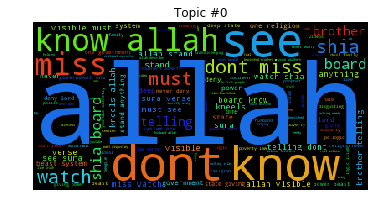

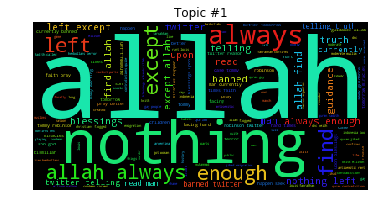

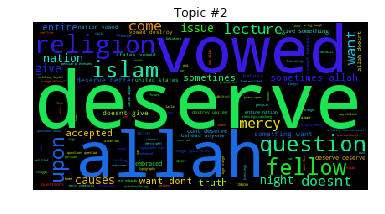

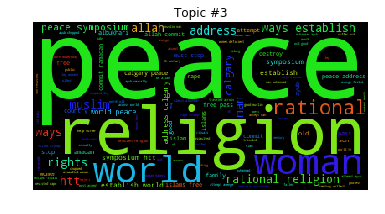

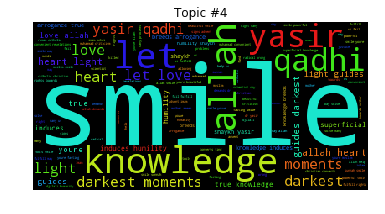

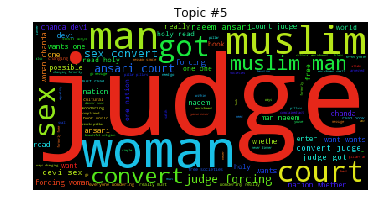

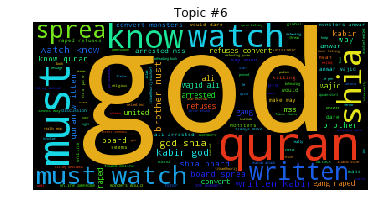

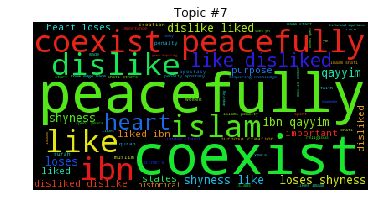

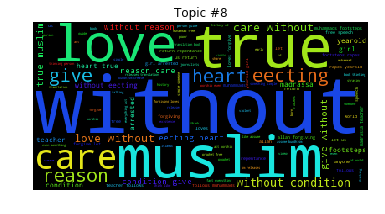

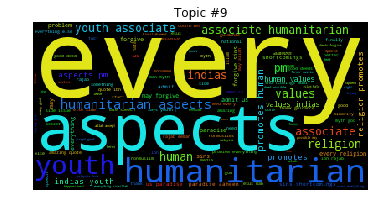

In [213]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [214]:
df

NameError: name 'df' is not defined